In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU

In [11]:
# Load the dataset
df = pd.read_excel('../dataset/Dataset_IoV.xlsx')  # Replace with your dataset path

# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']

X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(165420, 1, 6) (165420,) (206775, 1, 6)


In [5]:
def build_bi_lstm():
    model = Sequential()

    # Add a Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))

    # Add another Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [6]:
# Instantiate and train the model
model = build_bi_lstm()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
4136/4136 [==============================] - 116s 25ms/step - loss: 0.0250 - accuracy: 0.9890 - val_loss: 2.8180e-04 - val_accuracy: 1.0000
Epoch 2/5
4136/4136 [==============================] - 101s 24ms/step - loss: 3.3637e-04 - accuracy: 0.9999 - val_loss: 0.0111 - val_accuracy: 0.9964
Epoch 3/5
4136/4136 [==============================] - 118s 29ms/step - loss: 4.0632e-04 - accuracy: 0.9999 - val_loss: 3.3878e-04 - val_accuracy: 1.0000
Epoch 4/5
4136/4136 [==============================] - 110s 27ms/step - loss: 3.8761e-04 - accuracy: 0.9999 - val_loss: 2.5338e-04 - val_accuracy: 1.0000
Epoch 5/5
4136/4136 [==============================] - 100s 24ms/step - loss: 3.5560e-04 - accuracy: 0.9999 - val_loss: 2.7313e-04 - val_accuracy: 1.0000


In [7]:
import numpy as np

# Set numpy to display full float numbers
np.set_printoptions(suppress=True, precision=10)

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

1293/1293 [==============================] - 12s 9ms/step - loss: 1.0116e-04 - accuracy: 1.0000
Test Accuracy: 1.00


In [9]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')

1293/1293 [==============================] - 12s 8ms/step
Mean Squared Error (MSE): 0.0000233184153289
Root Mean Squared Error (RMSE): 0.0048289145083394


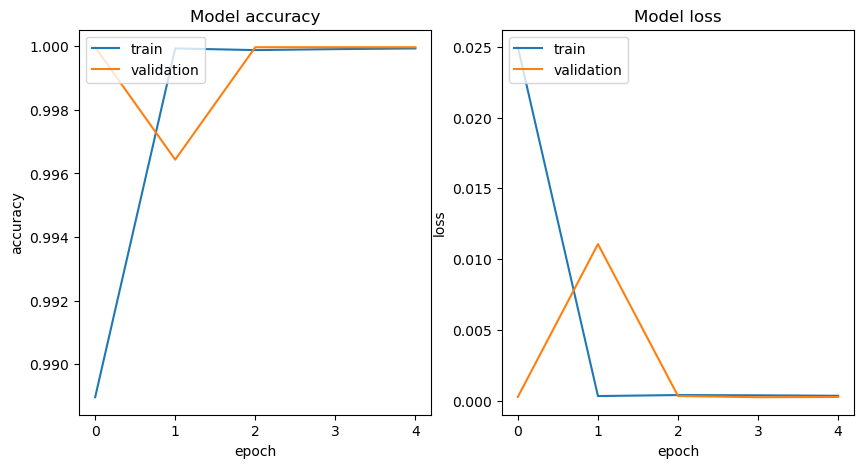

In [10]:
#visualizing the loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
